In [16]:
import pandas as pd

In [28]:
data = pd.read_csv("P:/Git/USD/bbc_news_text_complexity_summarization.csv")

In [18]:
data.head(10)

,text,labels,no_sentences,Flesch Reading Ease Score,Dale-Chall Readability Score,text_rank_summary,lsa_summary
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,26,62.17,9.72,It hopes to increase subscribers by offering t...,Its profits were buoyed by one-off gains which...
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,17,65.56,9.09,The dollar has hit its highest level against t...,"""I think the chairman's taking a much more san..."
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,14,69.21,9.66,The owners of embattled Russian oil giant Yuko...,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits\n\nBritish A...,business,24,62.98,9.86,Looking ahead to its full year results to Marc...,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,17,70.63,10.23,Reports in the Wall Street Journal and the Fin...,Shares in UK drinks and food firm Allied Domec...
5,Japan narrowly escapes recession\n\nJapan's ec...,business,13,48.70,10.38,Japan's economy teetered on the brink of a tec...,Revised figures indicated growth of just 0.1% ...
6,Jobs growth still slow in the US\n\nThe US cre...,business,15,60.95,9.06,The US created fewer jobs than expected in Jan...,"According to Labor Department figures, US firm..."
7,"India calls for fair trade rules\n\nIndia, whi...",business,16,59.53,9.11,"In London on Thursday ahead of the meeting, In...","India, which attends the G7 meeting of seven l..."
8,Ethiopia's crop production up 24%\n\nEthiopia ...,business,15,54.83,10.31,Ethiopia produced 14.27 million tonnes of crop...,"Good rains, increased use of fertilizers and i..."
9,Court rejects $280bn tobacco case\n\nA US gove...,business,10,48.64,11.28,A US government claim accusing the country's b...,A US government claim accusing the country's b...


In [29]:
#listing column names in dataset
data.columns = ['text', 'labels', 'no_sentences', 'Flesch Reading Ease Score', 'Dale-Chall Readability Score', 'text_rank_summary', 'Isa_summary']

#remove unnecessary columns 
data = data.drop(['Isa_summary', 'text_rank_summary'], axis =1)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 2127
Number of attributes = 5


,text,labels,no_sentences,Flesch Reading Ease Score,Dale-Chall Readability Score
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,26,62.17,9.72
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,17,65.56,9.09
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,14,69.21,9.66
3,High fuel prices hit BA's profits\n\nBritish A...,business,24,62.98,9.86
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,17,70.63,10.23


In [20]:
import numpy as np

In [30]:
#determine if there are missing values
data = data.replace('?', np.nan)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col, data[col].isna().sum()))

Number of instances = 2127
Number of attributes = 5
Number of missing values:
	text: 0
	labels: 0
	no_sentences: 0
	Flesch Reading Ease Score: 0
	Dale-Chall Readability Score: 0


In [32]:
import matplotlib.pyplot as plt

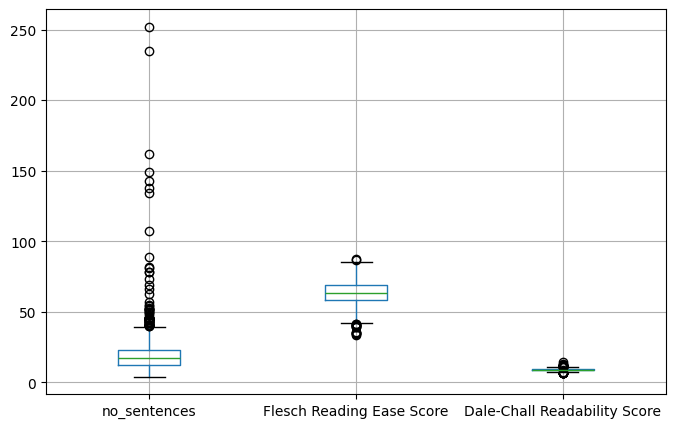

In [47]:
#indentify columns that contain outliers

data2 = data.drop(['text','labels'], axis = 1)
data2.boxplot(figsize = (8,5))

plt.show()

In [58]:
from scipy.stats import zscore

In [64]:
#compute z-score
Z = data2.apply(zscore)

#define outliers according to z-score
outlier = data2[(abs(Z) > 3).any(axis=1)]

In [63]:
#use IQR to identify and define outliers
Q1 = data2.quantile(0.25)
Q3 = data2.quantile(0.75)
IQR = Q3 - Q1

outlier_IQR = data2[
    (data2 < (Q1 - 1.5 * IQR)) | (data2 > (Q3 + 1.5 * IQR))
].dropna()


In [66]:
#replace outliers  with median
data3 = data2.mask((abs(Z) >3), data2.median(),axis =0)
data3

,no_sentences,Flesch Reading Ease Score,Dale-Chall Readability Score
0,26.0,62.17,9.72
1,17.0,65.56,9.09
2,14.0,69.21,9.66
3,24.0,62.98,9.86
4,17.0,70.63,10.23
...,...,...,...
2122,52.0,60.85,9.20
2123,17.0,56.29,9.23
2124,45.0,56.29,8.73
2125,16.0,47.42,9.14
